In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [128]:
df = pd.read_csv("baitap.csv")

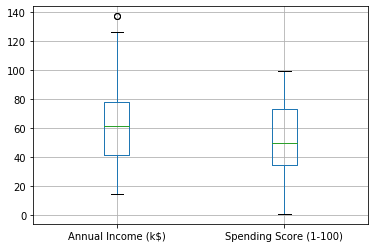

In [129]:
boxplot = df.boxplot(column=['Annual Income (k$)', 'Spending Score (1-100)'])

In [130]:
df=df.drop([198])

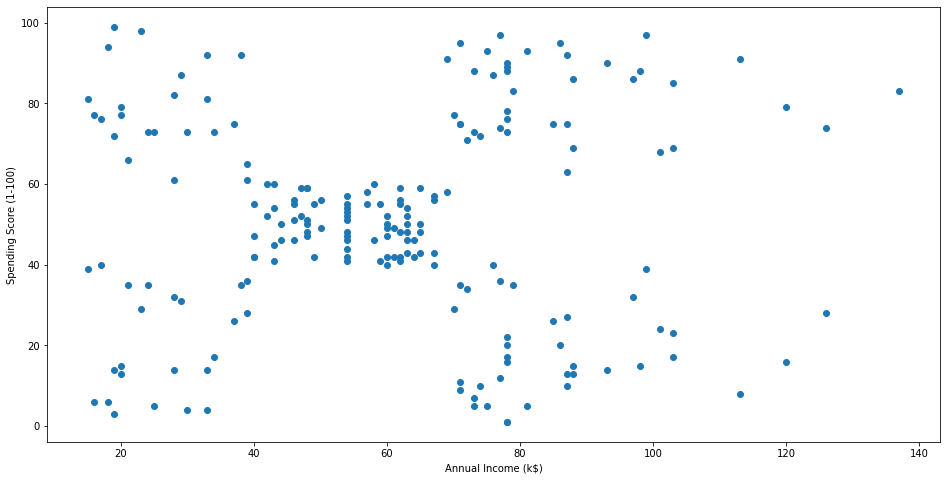

In [131]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
plt.show()

In [132]:
df=df[df['Annual Income (k$)'] < 110]
X = df.values

In [133]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
minmax=MinMaxScaler()
X[:,0]=minmax.fit_transform(X[:,0].reshape(-1,1)).ravel()



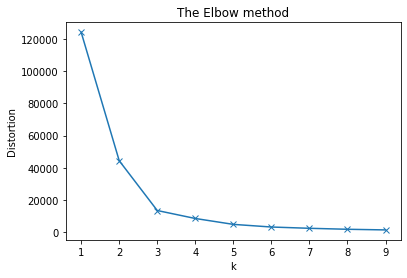

In [134]:
def elbow(X, fixed_k):
    distortions = []
    for k in fixed_k:
        cluster = KMeans(n_clusters=k)
        cluster.fit(X)
        distortions.append(cluster.inertia_)

    plt.plot(fixed_k, distortions, 'x-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow method')

elbow(X, range(1, 10))

In [135]:
K = 5
cluster = KMeans(n_clusters=K, init='k-means++')
cluster.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [136]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, cluster.labels_)
print("Score=", score)

Score= 0.6112168214641713
